# Visualize Convolution Activation Layers

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import time
from IPython import display
sns.set_style('whitegrid')

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D
from keras.layers.core import Activation
import keras.backend as K

Function to extract activations for all training samples

In [17]:
def get_activations(model, model_inputs, print_shape_only=True, layer_name=None):
    import keras.backend as K
    print('----- activations -----')
    activations = []
    inp = model.input

    model_multi_inputs_cond = True
    if not isinstance(inp, list):
        # only one input! let's wrap it in a list.
        inp = [inp]
        model_multi_inputs_cond = False

    outputs = [layer.output for layer in model.layers if
               layer.name == layer_name or layer_name is None]  # all layer outputs

    funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]  # evaluation functions

    if model_multi_inputs_cond:
        list_inputs = []
        list_inputs.extend(model_inputs)
        list_inputs.append(1.)
    else:
        list_inputs = [model_inputs, 1.]

    # Learning phase. 1 = Test mode (no dropout or batch normalization)
    # layer_outputs = [func([model_inputs, 1.])[0] for func in funcs]
    layer_outputs = [func(list_inputs)[0] for func in funcs]
    for layer_activations in layer_outputs:
        activations.append(layer_activations)
        if print_shape_only:
            print(layer_activations.shape)
        else:
            print(layer_activations)
    return activations

Load Dataset

In [25]:
(X_train, y_train), (X_test, y_test) = mnist_dataset = mnist.load_data()
reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
reshaped.shape

(60000, 28, 28, 1)

Construct model

In [19]:
num_filters = 12

In [27]:
# Model 
model = Sequential()

model.add(Convolution2D(12, (3, 3), input_shape=(28, 28, 1))) 
convout1 = Activation('relu')
model.add(convout1)

Pick a random image to visualize

In [28]:
from random import randint
img = randint(0, len(X_train) - 1)

Extract activations

In [29]:
%%time 
activations = get_activations(model, reshaped)

----- activations -----
(60000, 26, 26, 12)
(60000, 26, 26, 12)
CPU times: user 24.6 s, sys: 11.7 s, total: 36.3 s
Wall time: 24 s


Separate first and last layer

In [30]:
f_layer = activations[0]
l_layer = activations[1]

In [31]:
f_layer[0].shape

(26, 26, 12)

Plot random image

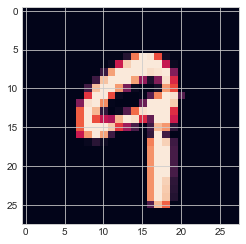

In [34]:
plt.imshow(reshaped[img][:,:,0]);

Iterate over activations and plot 

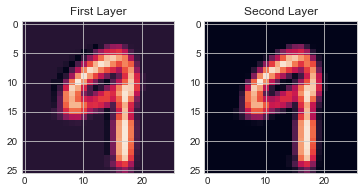

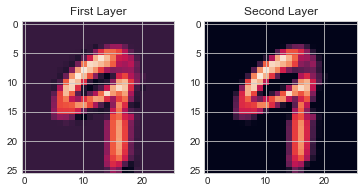

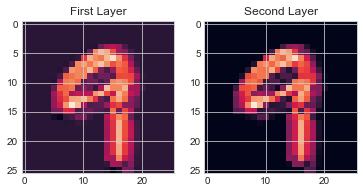

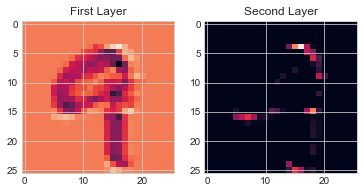

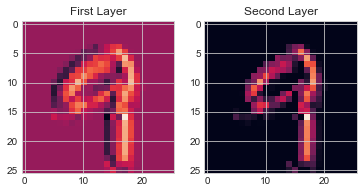

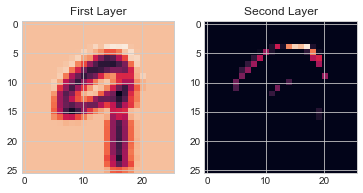

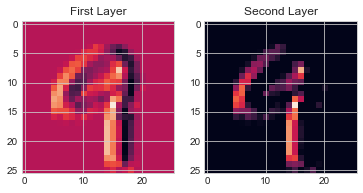

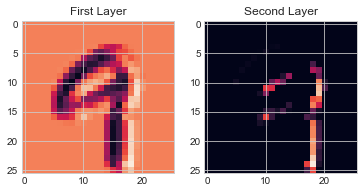

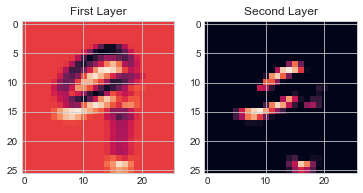

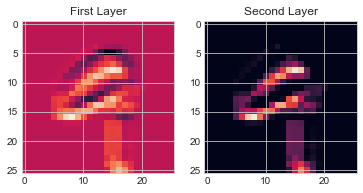

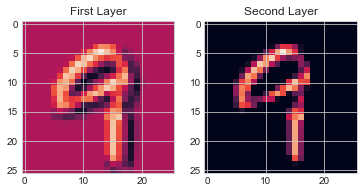

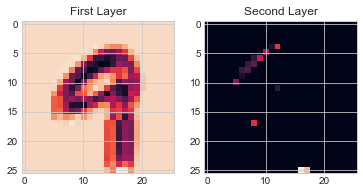

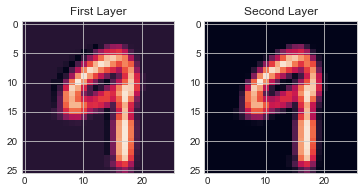

In [35]:
from IPython import display
for i in range(num_filters):
    f, ax = plt.subplots(1,2)
    
    ax[0].imshow(f_layer[img][:,:,i])
    ax[0].set_title('First Layer')
    
    ax[1].imshow(l_layer[img][:,:,i])
    ax[1].set_title('Second Layer')
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(1.0)